# import 

In [18]:
import numpy as np
import os
import pandas as pd

from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import f1_score, pairwise_distances, roc_auc_score
from scipy.cluster.vq import vq, kmeans

# data

In [7]:
train = np.load(os.path.join('..', 'datasets', 'train.npy'), allow_pickle=True)
test = np.load(os.path.join('..', 'datasets', 'test.npy'), allow_pickle=True)

train.shape, test.shape, 

((40000, 32, 32, 3), (10000, 32, 32, 3))

In [24]:
32*32*3

3072

# models

## KNN

高維度情況 歐幾里德距離比較大 不代表不相似

http://sofasofa.io/forum_main_post.php?postid=1001112

In [10]:
x = train.reshape(len(train), -1)
y = test.reshape(len(test), -1)
scores = list()
for n in range(1, 10):
    kmeans_x = MiniBatchKMeans(n_clusters=n, batch_size=100).fit(x)
    y_cluster = kmeans_x.predict(y)
    y_dist = np.sum(np.square(kmeans_x.cluster_centers_[y_cluster] - y), axis=1) # dy = [dy1, dy2], dy^2 = dy1^2 + dy2^2

    y_pred = y_dist

In [21]:
y_cluster

array([6, 0, 0, ..., 5, 4, 6], dtype=int32)

In [23]:
kmeans_x.cluster_centers_[0].shape

(3072,)

In [20]:
y_pred

array([468.41791987, 746.36231333, 449.26963517, ..., 474.45795663,
       454.14636158, 382.67705097])

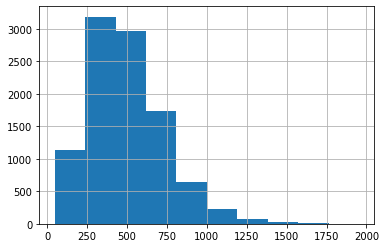

In [26]:
df = pd.DataFrame()
df['val'] = y_pred
df.val.hist()

## PCA


## autoencoder